# **Crop Recommendation**



In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_DRIVE/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.shape

(2200, 8)

In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [ ]:
data.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
# checking crops in the dataset
data['label'].value_counts()

lentil         100
mungbean       100
kidneybeans    100
jute           100
rice           100
banana         100
watermelon     100
blackgram      100
chickpea       100
mango          100
mothbeans      100
coconut        100
grapes         100
apple          100
pomegranate    100
coffee         100
papaya         100
pigeonpeas     100
muskmelon      100
cotton         100
orange         100
maize          100
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

Text(0.5, 0, 'Rainfall')

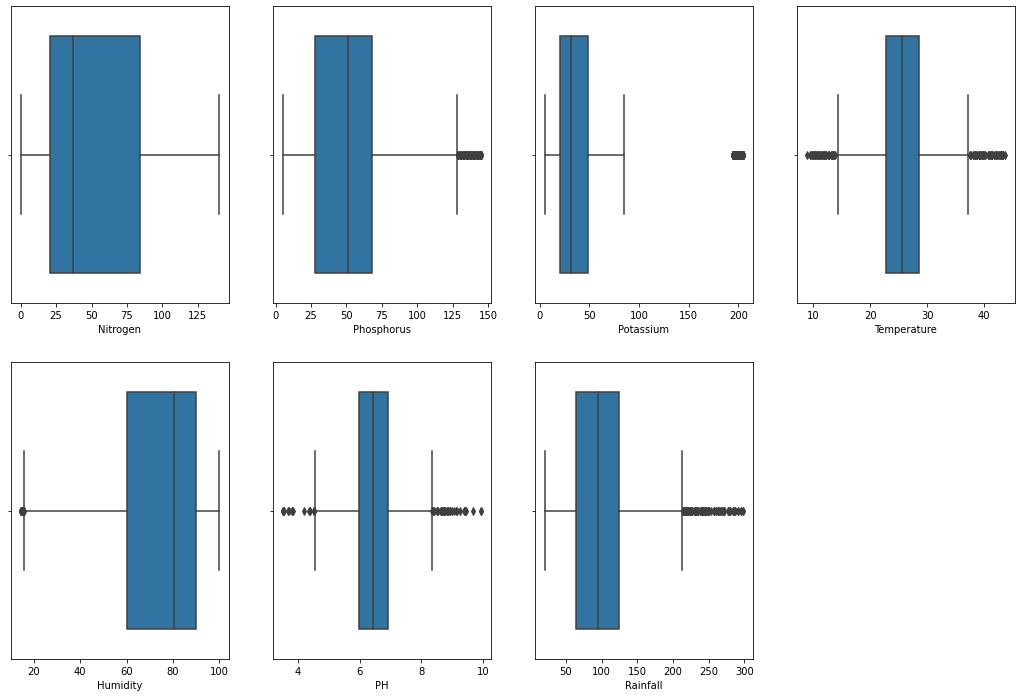

In [ ]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

plt.subplot(2,4,1)
sns.boxplot(data['N'])
plt.xlabel('Nitrogen')

plt.subplot(2,4,2)
sns.boxplot(data['P'])
plt.xlabel('Phosphorus')

plt.subplot(2,4,3)
sns.boxplot(data['K'])
plt.xlabel('Potassium')

plt.subplot(2,4,4)
sns.boxplot(data['temperature'])
plt.xlabel('Temperature')

plt.subplot(2,4,5)
sns.boxplot(data['humidity'])
plt.xlabel('Humidity')

plt.subplot(2,4,6)
sns.boxplot(data['ph'])
plt.xlabel('PH')

plt.subplot(2,4,7)
sns.boxplot(data['rainfall'])
plt.xlabel('Rainfall')

In [ ]:
crop_summary = pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


# **Data Visualization and Analysis**

In [ ]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

## Nitrogen Analysis

In [ ]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Phosphorous

In [ ]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Potassium

In [ ]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## N, P, K values comparision between crops


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

## NPK ratio for rice, cotton, jute, maize, lentil


In [ ]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = crop_summary[crop_summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

jute_npk = crop_summary[crop_summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

lentil_npk = crop_summary[crop_summary.index=='lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=15, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.8, font_size=15, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=15, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=15, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.8, font_size=15, showarrow=False)])
fig.show()


## NPK ratio for fruits


In [ ]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[
         {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)
cafe_colors =  ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

apple_npk = crop_summary[crop_summary.index=='apple']
values = [apple_npk['N'][0], apple_npk['P'][0], apple_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Apple", marker_colors=cafe_colors),1, 1)

banana_npk = crop_summary[crop_summary.index=='banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Banana", marker_colors=cafe_colors),1, 2)

grapes_npk = crop_summary[crop_summary.index=='grapes']
values = [grapes_npk['N'][0], grapes_npk['P'][0], grapes_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Grapes", marker_colors=cafe_colors),1, 3)

orange_npk = crop_summary[crop_summary.index=='orange']
values = [orange_npk['N'][0], orange_npk['P'][0], orange_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Orange", marker_colors=cafe_colors),1, 4)

mango_npk = crop_summary[crop_summary.index=='mango']
values = [mango_npk['N'][0], mango_npk['P'][0], mango_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Mango", marker_colors=cafe_colors),1, 5)

coconut_npk = crop_summary[crop_summary.index=='coconut']
values = [coconut_npk['N'][0], coconut_npk['P'][0], coconut_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Coconut", marker_colors=cafe_colors),2, 1)

papaya_npk = crop_summary[crop_summary.index=='papaya']
values = [papaya_npk['N'][0], papaya_npk['P'][0], papaya_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Papaya", marker_colors=cafe_colors),2, 2)

pomegranate_npk = crop_summary[crop_summary.index=='pomegranate']
values = [pomegranate_npk['N'][0], pomegranate_npk['P'][0], pomegranate_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Pomegranate", marker_colors=cafe_colors),2, 3)

watermelon_npk = crop_summary[crop_summary.index=='watermelon']
values = [watermelon_npk['N'][0], watermelon_npk['P'][0], watermelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Watermelon", marker_colors=cafe_colors),2, 4)

muskmelon_npk = crop_summary[crop_summary.index=='muskmelon']
values = [muskmelon_npk['N'][0], muskmelon_npk['P'][0], muskmelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Muskmelon", marker_colors=cafe_colors),2, 5)

fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[dict(text='Apple',x=0.06,y=1.08, font_size=15, showarrow=False),
                 dict(text='Banana',x=0.26,y=1.08, font_size=15, showarrow=False),
                 dict(text='Grapes',x=0.50,y=1.08, font_size=15, showarrow=False),
                 dict(text='Orange',x=0.74,y=1.08, font_size=15, showarrow=False),
                dict(text='Mango',x=0.94,y=1.08, font_size=15, showarrow=False),
                dict(text='Coconut',x=0.06,y=0.46, font_size=15, showarrow=False),
                 dict(text='Papaya',x=0.26,y=0.46, font_size=15, showarrow=False),
                 dict(text='Pomegranate',x=0.50,y=0.46, font_size=15, showarrow=False),
                 dict(text='Watermelon',x=0.74,y=0.46, font_size=15, showarrow=False),
                dict(text='Muskmelon',x=0.94,y=0.46, font_size=15, showarrow=False)])
fig.show()

In [ ]:
crop_scatter = data[(data['label']=='rice') | 
                      (data['label']=='jute') | 
                      (data['label']=='cotton') |
                     (data['label']=='maize') |
                     (data['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Correlation between different features


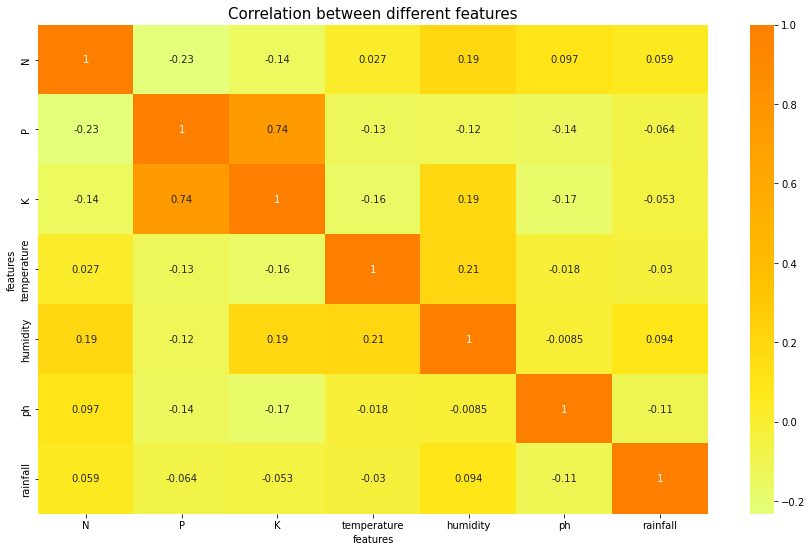

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(data.corr(), annot=True,cmap='Wistia' )
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

## Declare independent and target variables


In [ ]:
X = data.drop('label', axis=1)
y = data['label']

## Split dataset into training and test set


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)


## Deploying Models

### LightGBM Model Building and Training


In [ ]:
# build the lightgbm model
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# predict the results
y_pred=model.predict(X_test)

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9841


#### Compare train and test set accuracy

In [ ]:
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


#### Check for Overfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9841


#### Confusion-matrix


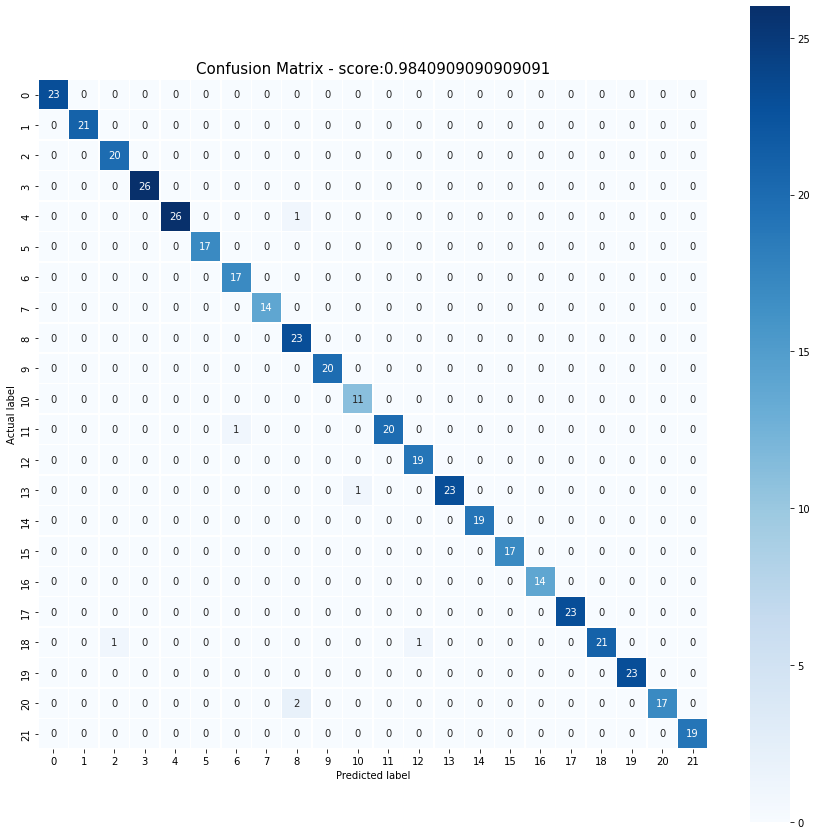

In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

#### Classification Metrices


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      1.00      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [ ]:
newdata=model.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
newdata

array(['banana'], dtype=object)

### Different Models

In [ ]:
### Preprocessing data
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ML_DRIVE/Crop_recommendation.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in X.columns:
            x = np.array(X[col]).reshape(-1,1)
            X[col]=scaler.fit_transform(x)

In [ ]:
#Splitting training data and testing data using train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42, test_size=0.2)

In [ ]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (1760, 7)
y_train:  (1760,)
X_test:  (440, 7)
y_test:  (440,)


In [ ]:
from sklearn.model_selection import train_test_split
#importing Decision Tree from sklearn
from sklearn.tree import DecisionTreeClassifier
#importing Logistic regression 
from sklearn.linear_model import LogisticRegression
#importing Support vector machine
from sklearn.svm import SVC
#importing Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
#importing random forest
from sklearn.ensemble import RandomForestClassifier
#importing K-Nearest classifier
from sklearn.neighbors import KNeighborsClassifier

### Decision Tree

In [170]:
#applying DT for Train data
dt = DecisionTreeClassifier(criterion='entropy')
model_dt = dt.fit(X_train, y_train)

In [171]:


#Checking Score of the model
score_dt=model_dt.score(X_test, y_test)
print("Accuracy for Decision Tree: ",score_dt)



Accuracy for Decision Tree:  0.9818181818181818


In [169]:
#model prediction
y_pred_dt = model_dt.predict(X_test)

In [ ]:
# generating report for classification result
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.93      1.00      0.97        14
      papaya       1.00    

### Logistic Regression

In [ ]:
#applying Logistic regression for Training data
# reg = LogisticRegression()
# try model_reg = reg.fit(X_train, y_train)

SyntaxError: ignored

In [ ]:
#Checking Score of the model
# score_reg=model_reg.score(X_test, y_test)
# print("Accuracy for Lofistic regression: ",score_reg)

### SVM

In [ ]:
#applying SVM for Training data
svm= SVC(kernel = 'linear')
model_svm = svm.fit(X_train, y_train)

In [ ]:
#Checking Score of the model
score_svm=model_svm.score(X_test, y_test)
print("Accuracy for Lofistic regression: ",score_svm)

Accuracy for Lofistic regression:  0.9772727272727273


In [ ]:
#model prediction
y_pred_svm = model_svm.predict(X_test)

In [ ]:
# generating report for classification result
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

### Gausian Naive Bayes

In [ ]:
#applying Gaussian NB for Training data
nb = GaussianNB()
model_nb = nb.fit(X_train, y_train)

In [ ]:
#Checking Score of the model
score_nb=model_nb.score(X_test, y_test)
print("Accuracy for Lofistic regression: ",score_nb)

Accuracy for Lofistic regression:  0.9954545454545455


In [ ]:
#model prediction
y_pred_nb = model_nb.predict(X_test)

In [ ]:
# generating report for classification result
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

### KNeighbours

In [ ]:
#applying KNeighbors for Training data
kn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
model_kn = kn.fit(X_train, y_train)

In [ ]:
#Checking Score of the model
score_kn=model_kn.score(X_test, y_test)
print("Accuracy for Lofistic regression: ",score_kn)

Accuracy for Lofistic regression:  0.95


In [ ]:
#model prediction
y_pred_kn = model_kn.predict(X_test)

In [ ]:
# generating report for classification result
print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.74      1.00      0.85        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.95      0.98        21
       mango       0.83      1.00      0.90        19
   mothbeans       1.00      0.83      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

### RandomForest

In [ ]:
#applying KNeighbors for Training data
rf = RandomForestClassifier(n_estimators=100, criterion = 'entropy')
model_rf = rf.fit(X_train, y_train)

In [ ]:
#Checking Score of the model
score_rf=model_rf.score(X_test, y_test)
print("Accuracy for Lofistic regression: ",score_rf)

Accuracy for Lofistic regression:  0.9931818181818182


In [ ]:
#model prediction
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# generating report for classification result
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

## Results

In [ ]:
# creating dictionarries for scores
total_score = {"DT":score_dt, "SVM":score_svm, "GaussianNB":score_nb, "K-Niegh":score_kn, "Rand_forest":score_rf}
total_score

{'DT': 0.9863636363636363,
 'GaussianNB': 0.9954545454545455,
 'K-Niegh': 0.95,
 'Rand_forest': 0.9931818181818182,
 'SVM': 0.9772727272727273}

In [164]:
model = list(total_score.keys())
score = list(total_score.values())

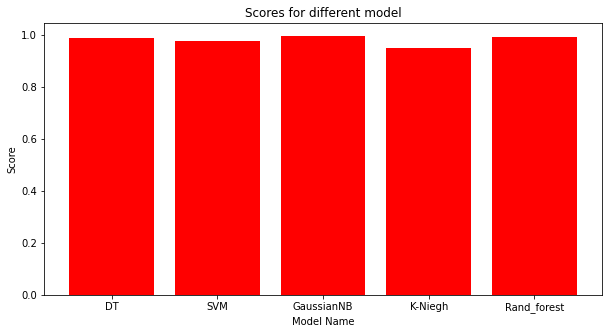

In [ ]:
#ploting a Bar graph for different modes and its score
plt.figure(figsize=(10, 5))
plt.bar(model,score,color ='red',width=0.8)
plt.xlabel("Model Name")
plt.ylabel("Score")
plt.title("Scores for different model")
plt.show()